<a href="https://colab.research.google.com/github/2413323037038-stack/Retinal-Biometrics-Enhanced-with-Deep-Learning-Techniques-/blob/main/Encryption(VIT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import hashlib



In [ ]:
def encrypt_feature_vector(features):
    """
    Convert a feature vector into a secure SHA-256 hash.
    """
    feature_bytes = features.tobytes()
    hash_object = hashlib.sha256(feature_bytes)
    encrypted = hash_object.hexdigest()
    return encrypted



In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import os

model = VGG16(weights='imagenet', include_top=False, pooling='avg')

def extract_features(img_path):
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        features = model.predict(img_array)
        return features.flatten()
    except Exception as e:
        print(f"Error reading {img_path}: {e}")
        return None


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import glob

extract_dir = '/content/your_dataset_folder'  # Change this path accordingly

train_paths = glob.glob(extract_dir + "/train/**/*.jpg", recursive=True)
test_paths = glob.glob(extract_dir + "/test/**/*.jpg", recursive=True)



In [ ]:
train_features = []
train_files = []

for path in train_paths:
    feat = extract_features(path)
    if feat is not None:
        train_features.append(feat)
        train_files.append(path)

train_features = np.array(train_features)

test_features = []
test_files = []

for path in test_paths:
    feat = extract_features(path)
    if feat is not None:
        test_features.append(feat)
        test_files.append(path)

test_features = np.array(test_features)



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import matplotlib.pyplot as plt
import hashlib

def encrypt_feature_vector(features):
    feature_bytes = features.tobytes()
    return hashlib.sha256(feature_bytes).hexdigest()

for i, test_feat in enumerate(test_features):
    sims = cosine_similarity([test_feat], train_features)[0]
    best_match_idx = np.argmax(sims)

    encrypted_hash = encrypt_feature_vector(test_feat)

    print(f"\nTest image: {os.path.basename(test_files[i])}")
    print(f"Best match: {os.path.basename(train_files[best_match_idx])}")
    print(f"Similarity: {sims[best_match_idx]:.4f}")
    print(f"Encrypted feature hash: {encrypted_hash}")

    test_img = Image.open(test_files[i])
    train_img = Image.open(train_files[best_match_idx])
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(test_img)
    axes[0].set_title("Test Image")
    axes[0].axis("off")
    axes[1].imshow(train_img)
    axes[1].set_title("Best Match")
    axes[1].axis("off")
    plt.show()



In [ ]:
import csv

with open("biometric_results.csv", mode="w", newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Test Image", "Best Match", "Similarity", "Encrypted Hash"])

    for i, test_feat in enumerate(test_features):
        sims = cosine_similarity([test_feat], train_features)[0]
        best_match_idx = np.argmax(sims)
        encrypted_hash = encrypt_feature_vector(test_feat)

        writer.writerow([
            os.path.basename(test_files[i]),
            os.path.basename(train_files[best_match_idx]),
            f"{sims[best_match_idx]:.4f}",
            encrypted_hash
        ])



In [ ]:
threshold = 0.85

for i, test_feat in enumerate(test_features):
    sims = cosine_similarity([test_feat], train_features)[0]
    best_match_idx = np.argmax(sims)
    max_sim = sims[best_match_idx]

    if max_sim >= threshold:
        print(f"Access Granted: {os.path.basename(test_files[i])} matches with {os.path.basename(train_files[best_match_idx])}")
    else:
        print(f"Access Denied: {os.path.basename(test_files[i])} did not match any record")


In [ ]:
user_hashes = {}

for i, feat in enumerate(train_features):
    encrypted = encrypt_feature_vector(feat)
    user_hashes[os.path.basename(train_files[i])] = encrypted


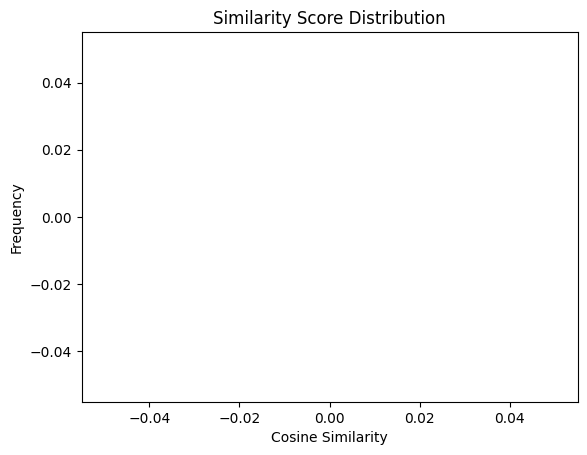

In [ ]:
import seaborn as sns

all_sims = []
for test_feat in test_features:
    sims = cosine_similarity([test_feat], train_features)[0]
    all_sims.extend(sims)

sns.histplot(all_sims, bins=30)
plt.title("Similarity Score Distribution")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()
